<a id = 'toc'></a>
# Table of Contents

- ### [Trend, Seasonality, Noise](#trend_seasonality_noise)
- ### [Factors](#factors)
    - [Window Functions](#window_functions)
    - [Moving Average](#moving_average)
    - [Lags](#lags)
- ### [AR (Autoregressive) model](#ar_model)
    - [Random generated time series](#random_time_series)
    - [STOCK time series data](#stock)
    - [AutoReg on non-stationary time series](#autoreg_non_stationary)
    - [AutoReg on stationary time series](#autoreg_stationary)

<a id = 'trend_seasonality_noise'></a>
# Trend, Seasonality, Noise

"Seasonal decompose" helps us to decompose the time series into trend and seasonality. 



In [3]:
import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('Upload/15.5.AirPassengers.csv')
df.columns = ['month', 'passengers']
df.head()

,month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       144 non-null    object
 1   passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df = df.set_index(pd.DatetimeIndex(df['month']))
df.head()

,month,passengers
month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [7]:
df.drop(columns = ['month'], axis = 0, inplace = True)

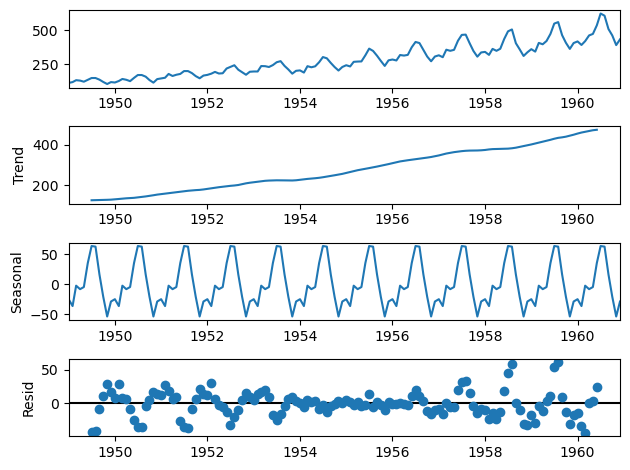

In [8]:
decomposition = seasonal_decompose(df, model = 'addative')
decomposition.plot()
plt.show()

In [9]:
trend_part = decomposition.trend
seasonal_part = decomposition.seasonal
residual_part = decomposition.resid

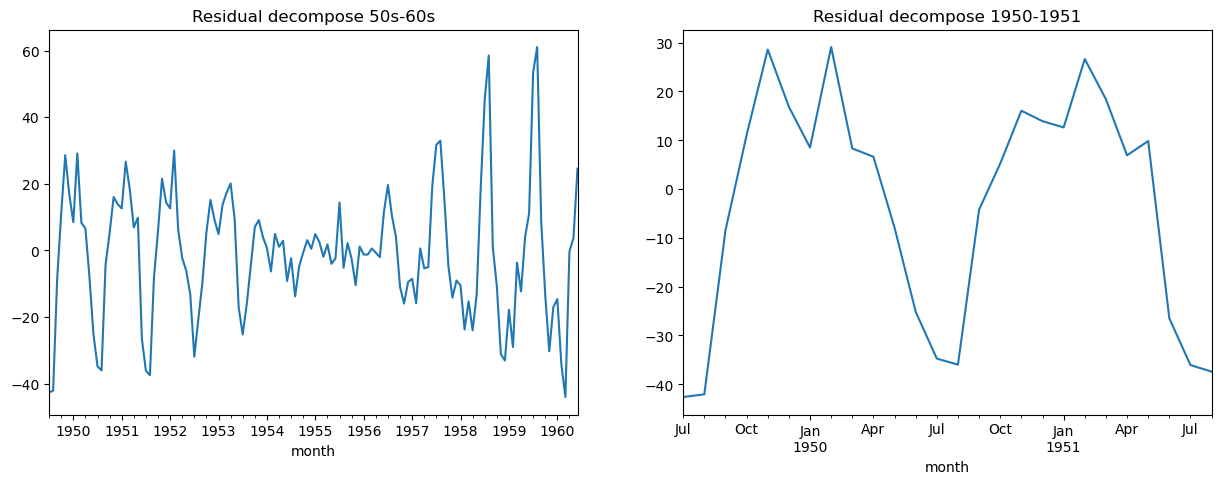

In [10]:
residual_part = residual_part.dropna()

fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (15, 5))
residual_part.plot(ax = ax1)
residual_part['1949-07-01':'1951-08-01'].plot(ax = ax2)
ax1.set_title('Residual decompose 50s-60s')
ax2.set_title('Residual decompose 1950-1951')
plt.show()

<a id = 'factors'></a>
# Factors

<a id = 'window_functions'></a>
## Window Functions in Pandas

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
df = pd.read_csv('Upload/15.8.csv')
df['ts'] = pd.to_datetime(df.ts)
df = df.iloc[1000:1100]
df.reset_index(drop = True, inplace = True)
df.head()

,ts,open,high,low,close,vol
0,2018-01-02 18:42:00,1314.3,1314.4,1313.9,1313.9,323
1,2018-01-02 18:43:00,1314.0,1314.2,1314.0,1314.0,177
2,2018-01-02 18:44:00,1314.0,1314.0,1313.7,1313.9,216
3,2018-01-02 18:45:00,1313.9,1314.1,1313.8,1314.0,170
4,2018-01-02 18:46:00,1314.0,1314.1,1314.0,1314.0,186


In [13]:
def myMax(value):
    return max(value)

df['rolling_mean'] = df.close.rolling(window = 5).mean()
df['rolling_std'] = df.close.rolling(window = 5).std()
df['rolling_max'] = df.close.rolling(window = 5).apply(myMax, raw = False)

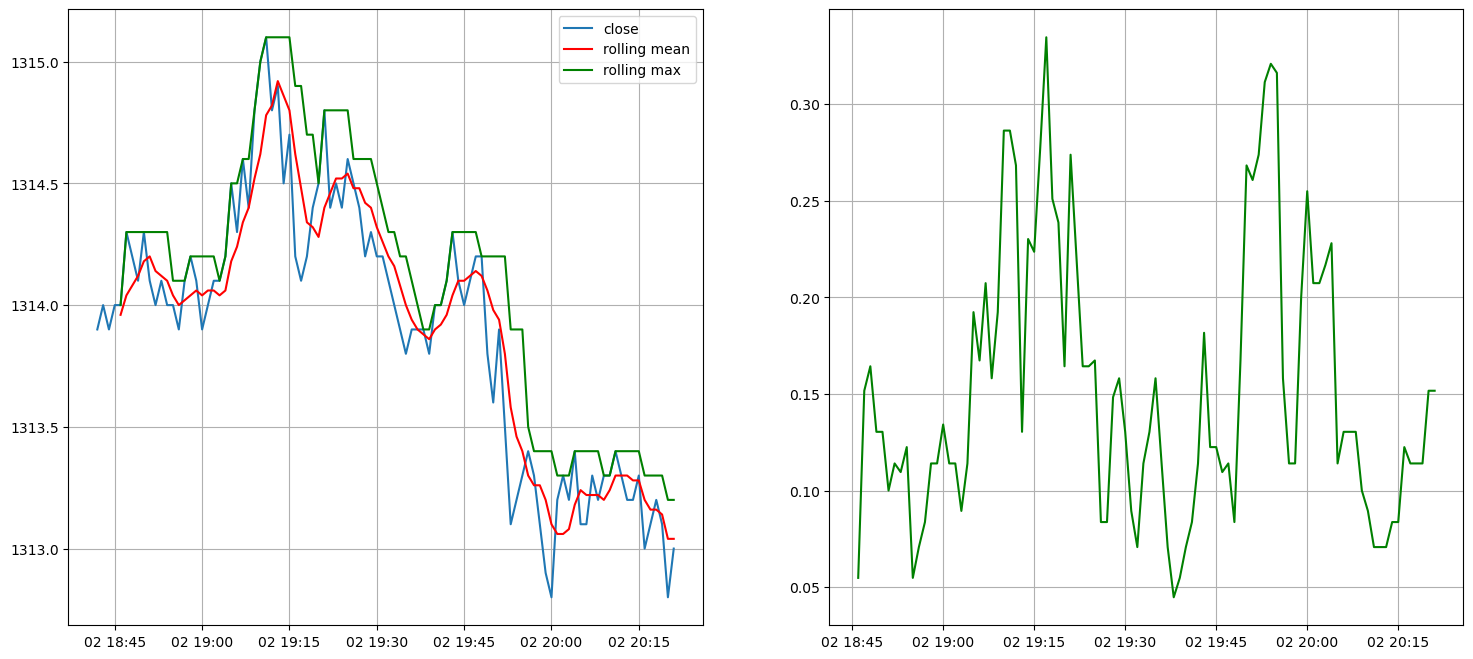

,ts,open,high,low,close,vol,rolling_mean,rolling_std,rolling_max
0,2018-01-02 18:42:00,1314.3,1314.4,1313.9,1313.9,323,NaN,NaN,NaN
1,2018-01-02 18:43:00,1314.0,1314.2,1314.0,1314.0,177,NaN,NaN,NaN
2,2018-01-02 18:44:00,1314.0,1314.0,1313.7,1313.9,216,NaN,NaN,NaN
3,2018-01-02 18:45:00,1313.9,1314.1,1313.8,1314.0,170,NaN,NaN,NaN
4,2018-01-02 18:46:00,1314.0,1314.1,1314.0,1314.0,186,1313.96,0.054772,1314.0
5,2018-01-02 18:47:00,1314.0,1314.3,1314.0,1314.3,99,1314.04,0.151658,1314.3
6,2018-01-02 18:48:00,1314.3,1314.4,1314.2,1314.2,99,1314.08,0.164317,1314.3
7,2018-01-02 18:49:00,1314.2,1314.2,1314.1,1314.1,113,1314.12,0.130384,1314.3
8,2018-01-02 18:50:00,1314.2,1314.3,1314.1,1314.3,129,1314.18,0.130384,1314.3
9,2018-01-02 18:51:00,1314.4,1314.4,1314.1,1314.1,139,1314.20,0.100000,1314.3


In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].plot(df.ts, df.close)
ax[0].plot(df.ts, df.rolling_mean, c='r')
ax[0].plot(df.ts, df.rolling_max,  c='g')
ax[0].legend(['close', 'rolling mean', 'rolling max'])
ax[0].grid()

ax[1].plot(df.ts, df.rolling_std, c='g') ## оконное стандартное отклонение
ax[1].grid()
plt.show()

df.head(12)

<a id = 'moving_average'></a>
## Moving Average

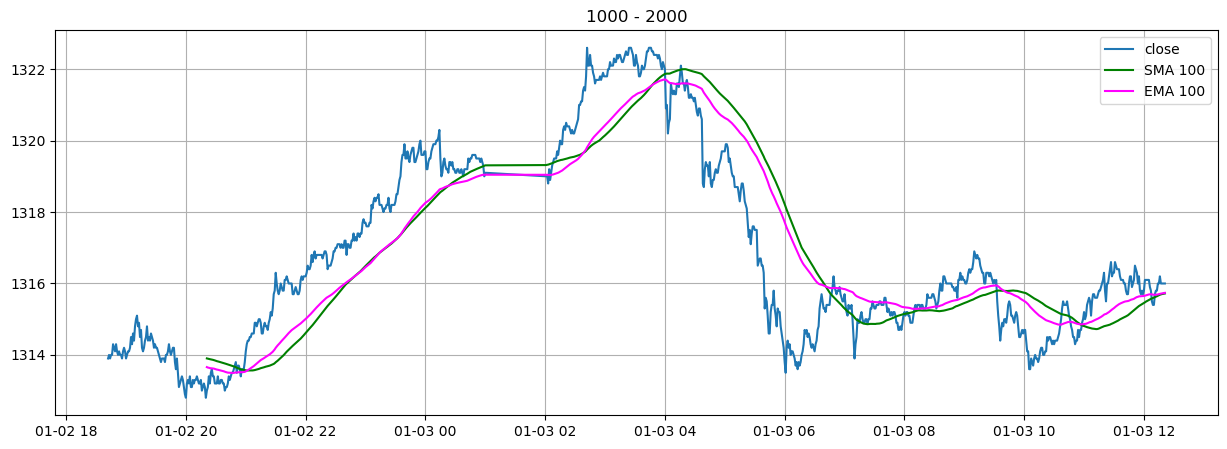

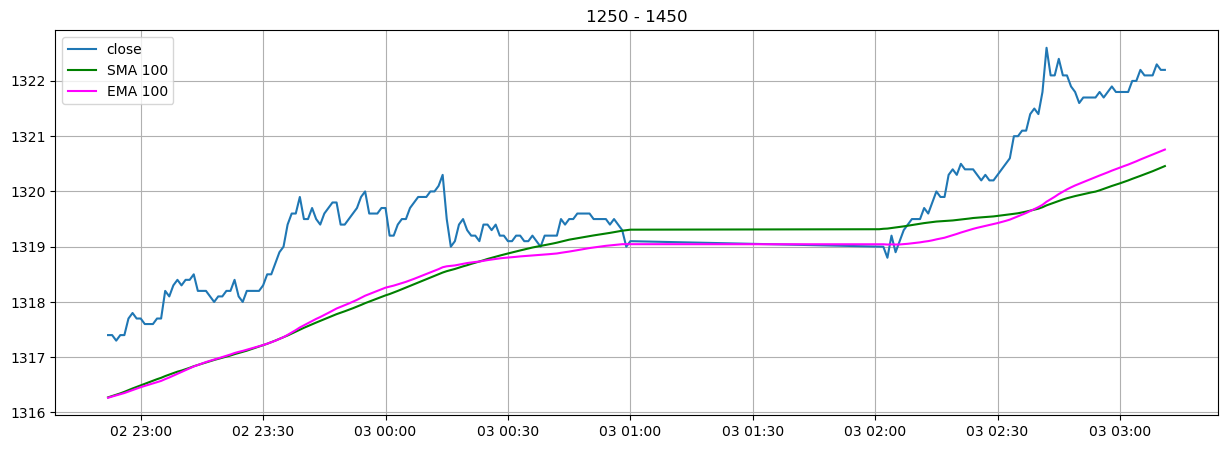

In [15]:
df = pd.read_csv('Upload/15.8.csv')
df['ts'] = pd.to_datetime(df.ts)
df = df.iloc[1000:2000]

df['rolling_mean_100'] = df.close.rolling(window = 100).mean()
df['rolling_ema_100'] = df.close.ewm(min_periods = 100, span = 100).mean()

fig, axes = plt.subplots(1, 1, figsize = (15,5))

axes.plot(df.ts, df['close'])
axes.plot(df.ts, df['rolling_mean_100'], c = 'g')
axes.plot(df.ts, df['rolling_ema_100'], c = 'magenta')
axes.legend(['close', 'SMA 100', 'EMA 100'])
axes.set_title('1000 - 2000')
axes.grid()

fig, axes = plt.subplots(1, 1, figsize = (15,5))

axes.plot(df.ts[250:450], df['close'][250:450])
axes.plot(df.ts[250:450], df['rolling_mean_100'][250:450], c = 'g')
axes.plot(df.ts[250:450], df['rolling_ema_100'][250:450], c = 'magenta')
axes.legend(['close', 'SMA 100', 'EMA 100'])
axes.set_title('1250 - 1450')
axes.grid()

plt.show()

<a id = 'lags'></a>
## Lags

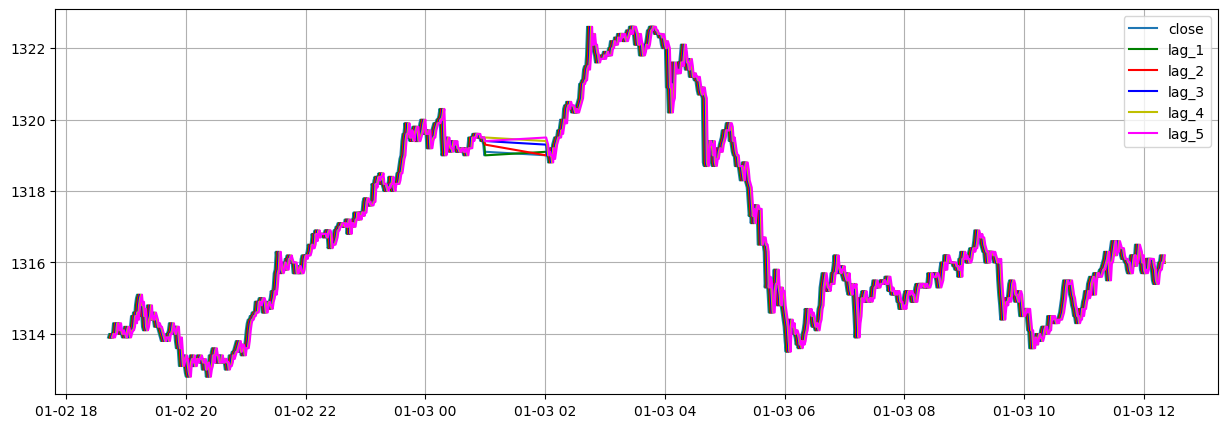

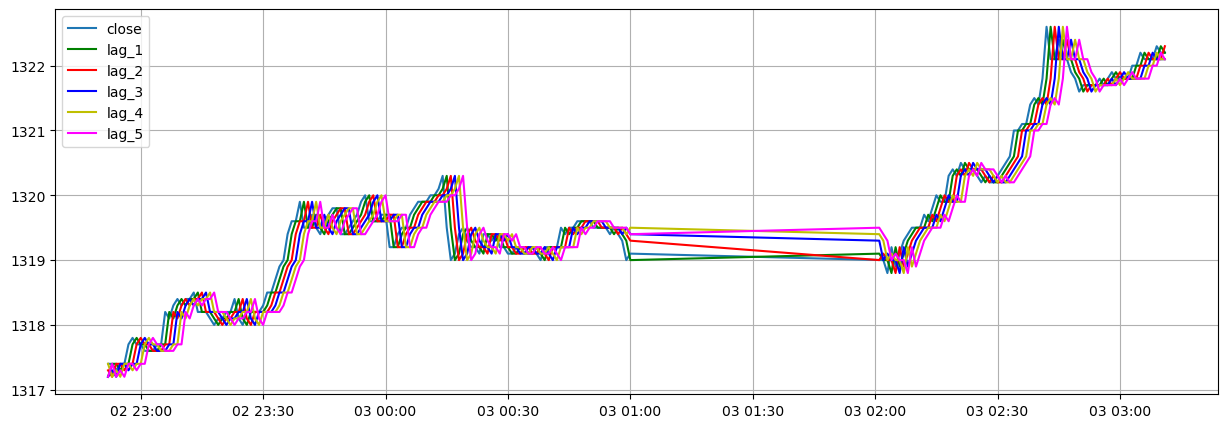

In [16]:
for i in range(1,6):
    df['lag_{}'.format(i)] = df.close.shift(i)


f, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(df.ts, df.close)
ax.plot(df.ts, df['lag_' + str(1)],  c='g') 
ax.plot(df.ts, df['lag_' + str(2)],  c='r') 
ax.plot(df.ts, df['lag_' + str(3)],  c='b') 
ax.plot(df.ts, df['lag_' + str(4)],  c='y') 
ax.plot(df.ts, df['lag_' + str(5)],  c='magenta') 
ax.legend(['close', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5'])
ax.grid()

f, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(df.ts[250:450], df.close[250:450])
ax.plot(df.ts[250:450], df['lag_' + str(1)][250:450],  c='g') 
ax.plot(df.ts[250:450], df['lag_' + str(2)][250:450],  c='r') 
ax.plot(df.ts[250:450], df['lag_' + str(3)][250:450],  c='b') 
ax.plot(df.ts[250:450], df['lag_' + str(4)][250:450],  c='y') 
ax.plot(df.ts[250:450], df['lag_' + str(5)][250:450],  c='magenta') 
ax.legend(['close', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5'])
ax.grid()

<hr style="border:1px solid gray">

<a id = 'ar_model'></a>
# AR (Autoregressive) model

<a id = 'random_time_series'></a>
## Random generated time series

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

## Generate time series data

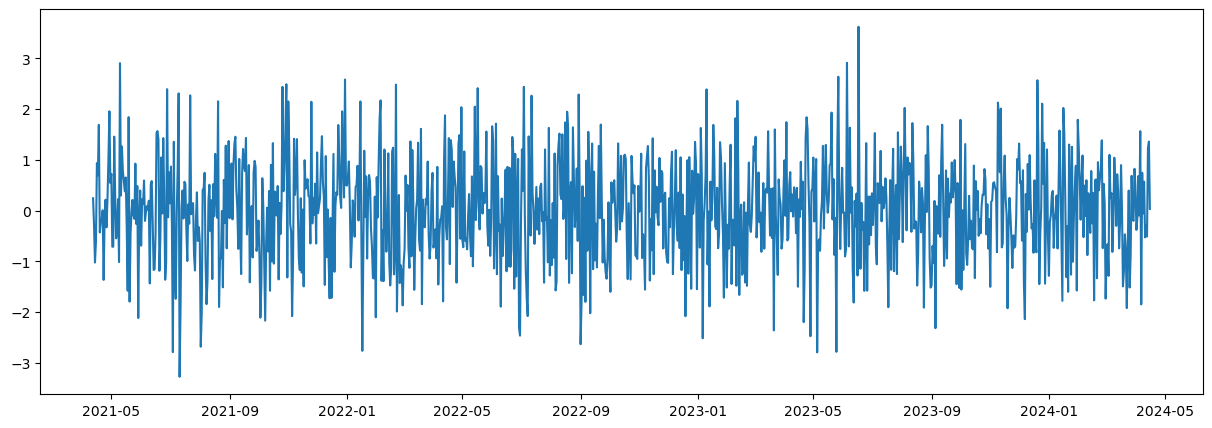

In [18]:
num = 1100

date_today = datetime.datetime.today()
date_list = pd.to_datetime([date_today - datetime.timedelta(days = x) for x in range(num)]).date

generator = np.random.default_rng(seed = 11)
y = generator.standard_normal((num, 1))
z = generator.random((num, 1))

df_test = pd.DataFrame(np.c_[y, z], columns = ['close', 'open'], index = pd.DatetimeIndex(date_list))
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(df_test.index, df_test['close'])
plt.show()

## Analyse time series data

### Check the distribution inside different windows

[DIST 1 - DIST 2]: 0.979
[DIST 2 - DIST 3]: 0.414
[DIST 1 - DIST 3]: 0.708


C:\Users\Leo\AppData\Local\Temp\ipykernel_16552\3304259781.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dist_split_1, ax = ax[0])
C:\Users\Leo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Leo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na',

<Axes: xlabel='close', ylabel='Density'>

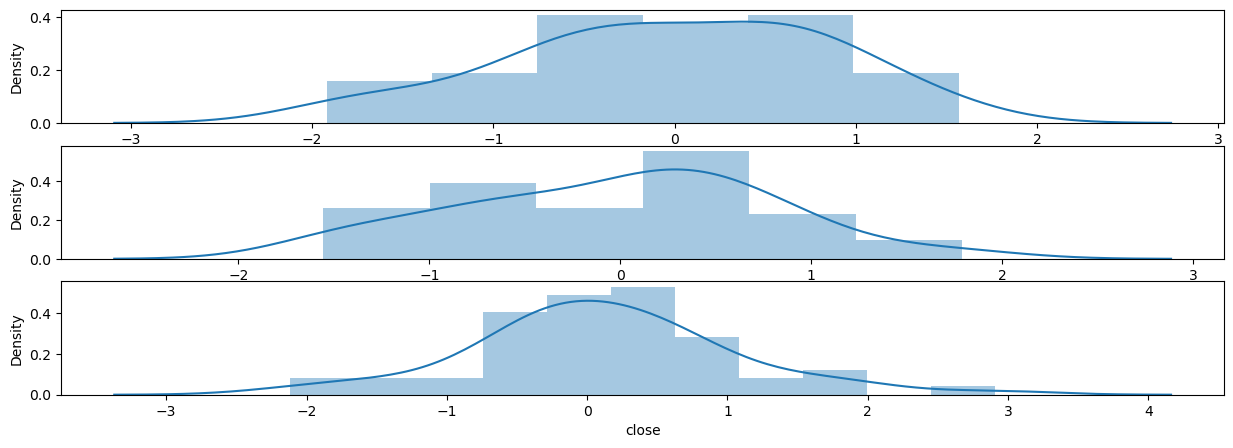

In [19]:
import seaborn as sns
from scipy.stats import ks_2samp

dist_split_1 = df_test.iloc[:int(len(df_test) * .05)]['close']
dist_split_2 = df_test.iloc[int(len(df_test) * .15):int(len(df_test) * .2)]['close']
dist_split_3 = df_test.iloc[-int(len(df_test) * .05):-1]['close']

print(f'[DIST 1 - DIST 2]: {ks_2samp(dist_split_1, dist_split_2)[1]:.3f}')
print(f'[DIST 2 - DIST 3]: {ks_2samp(dist_split_2, dist_split_3)[1]:.3f}')
print(f'[DIST 1 - DIST 3]: {ks_2samp(dist_split_1, dist_split_3)[1]:.3f}')

fig, ax = plt.subplots(3, 1, figsize = (15, 5))
sns.distplot(dist_split_1, ax = ax[0])
sns.distplot(dist_split_2, ax = ax[1])
sns.distplot(dist_split_3, ax = ax[2])

<div class = 'alert alert-info'>
    <p>
        <b>Interpretation:</b> By comparing the similarity of the distributions within the selected windows, we can assume that the time series has strong stationarity.
    </p>
</div>

### Decomposition

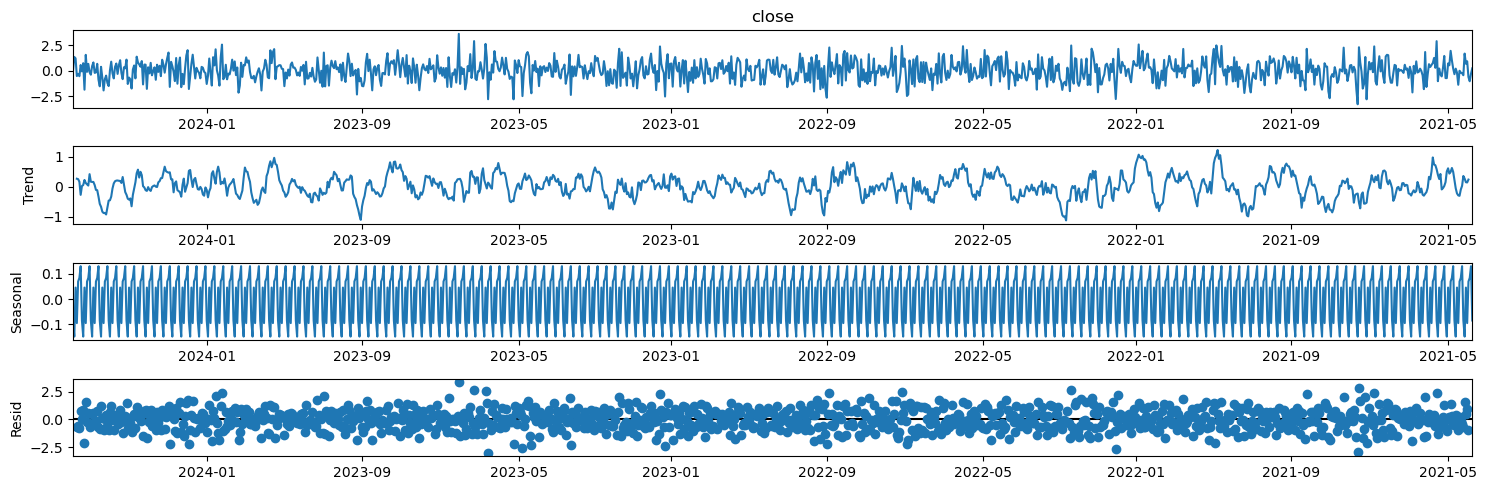

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposer = seasonal_decompose(df_test['close'], model = 'additive')

fig = decomposer.plot()
fig.set_size_inches((15, 5))
fig.tight_layout()
plt.show()

<div class = 'alert alert-info'>
    <p>
        <b>Interpretation:</b> The decomposition of the time series excludes trend and seasonal effects, indicating that the time series contain stationarity.
    </p>
</div>

### Adfuller Test

In [21]:
from statsmodels.tsa.stattools import adfuller

adfuller_test = adfuller(df_test['close'])

print(f'1. Critical Value: {adfuller_test[0]:.2f}')
print(f'2. P-Value: {adfuller_test[1]:.3f}')
print(f'3. Lags used in the regression to determine T-statistic: {adfuller_test[2]}')
print(f'4. Number of observations used in the analysis: {adfuller_test[3]}')
print(f'5. T-values corresponding to adfuller test:')
for key, val in adfuller_test[4].items():
    print(f'\t → {key} : {val:.2f}')

1. Critical Value: -33.26
2. P-Value: 0.000
3. Lags used in the regression to determine T-statistic: 0
4. Number of observations used in the analysis: 1099
5. T-values corresponding to adfuller test:
	 → 1% : -3.44
	 → 5% : -2.86
	 → 10% : -2.57


<div class = 'alert alert-info'>
    <p>
        <b>Interpretation:</b> We reject the null hypothesis in favour of the alternative hypothesis that the time series contains stationarity.
    </p>
</div>

### ACF and PACF

C:\Users\Leo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


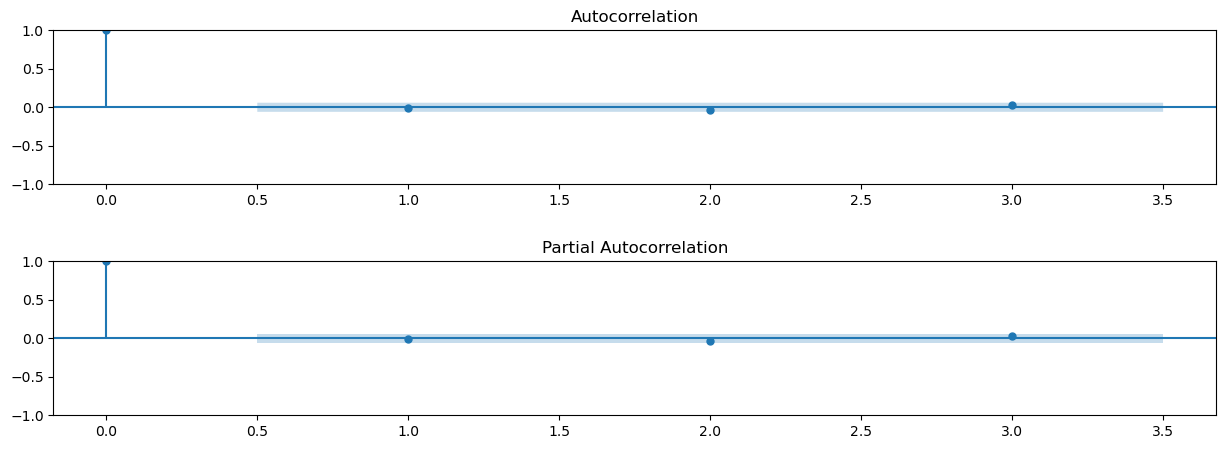

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize = (15, 5))
plot_acf(df_test['close'], lags = 3, ax = ax[0])
plot_pacf(df_test['close'], lags = 3, ax = ax[1])
fig.subplots_adjust(hspace = .5)
plt.show()

<div class = 'alert alert-info'>
    <p>
        <b>Interpretation:</b> We see that both autocorrelation functions show low lag effect on forecasting. Therefore, we'll use the constant variable and set the parameter lags = 0.
    </p>
</div>

### AR select order

In [23]:
from statsmodels.tsa.ar_model import ar_select_order

ar_select_order(df_test['close'], maxlag = 12).ar_lags

C:\Users\Leo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
C:\Users\Leo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Leo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
C:\Users\Leo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Train and Test

In [24]:
df_test = df_test.sort_index()
x_train = df_test[:int(len(df_test) * .3)]
x_test = df_test[int(len(df_test) * .3):]

### AutoReg (AR)

In [25]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(x_train['close'], lags = 0).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  close   No. Observations:                  330
Model:                     AutoReg(0)   Log Likelihood                -485.808
Method:               Conditional MLE   S.D. of innovations              1.055
Date:                Mon, 15 Apr 2024   AIC                            975.615
Time:                        12:04:58   BIC                            983.214
Sample:                    04-12-2021   HQIC                           978.646
                         - 03-07-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.058      0.068      0.946      -0.110       0.118


C:\Users\Leo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<div class = 'alert alert-info'>
    <p>
        <b>Interpretation:</b> The p-value indicates low significance of the constant.
    </p>
</div>

C:\Users\Leo\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\Leo\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Leo\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Leo\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a futur

[RMSE]: 0.98


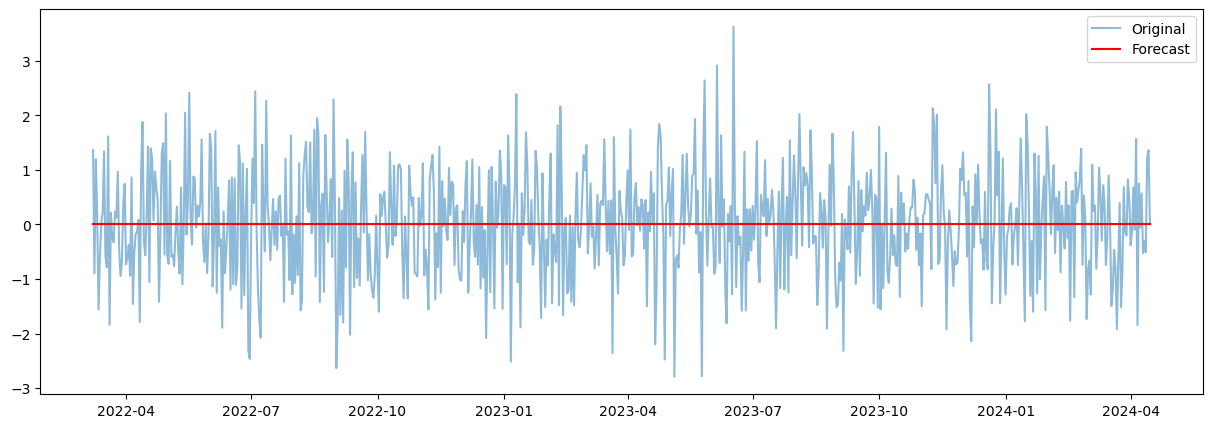

In [26]:
from sklearn.metrics import mean_squared_error

forecast = model.predict(start = len(x_train), end = len(df_test) - 1, dynamic = False)

rmse = np.sqrt(mean_squared_error(x_test['close'], forecast))
print(f'[RMSE]: {rmse:.2f}')

fig, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(x_test['close'], alpha = .5)
ax.plot(forecast, c = 'r')
ax.legend(['Original', 'Forecast'])
plt.show()

<div class = 'alert alert-info'>
    <p>
        <b>Interpretation:</b> The AR model forecasted the test time series data by using the constant mean of the time series.
    </p>
</div>

<hr style="border:1px solid gray">

<a id = 'stock'></a>
# STOCK time series data

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import ar_select_order, AutoReg

from scipy.stats import ks_2samp

In [28]:
df = pd.read_csv('Upload/15.8.csv')
df['ts'] = pd.to_datetime(df['ts'])
df = df.set_index('ts').sort_index()

## Distribution

[DIST 1] - [DIST 2]: 0.000 , [MEAN]: 1317.04 - 1325.53, [STD]: 4.41 - 10.63
[DIST 2] - [DIST 3]: 0.000 , [MEAN]: 1325.53 - 1275.46, [STD]: 10.63 - 6.95
[DIST 1] - [DIST 3]: 0.000 , [MEAN]: 1317.04 - 1275.46, [STD]: 4.41 - 6.95


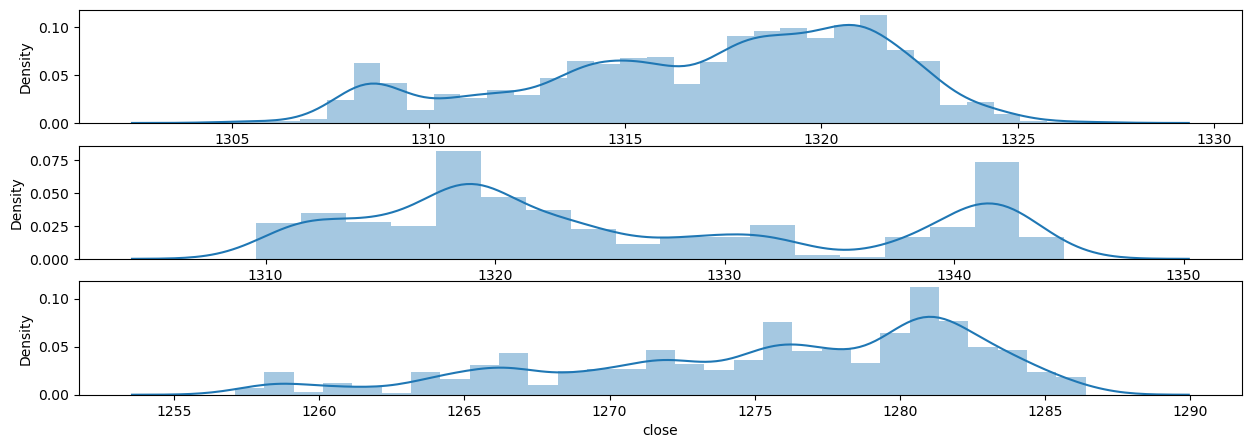

In [34]:
dist_split_1 = df.iloc[:int(len(df) * .02)]['close']
dist_split_2 = df.iloc[int(len(df) * .02):int(len(df) * .04)]['close']
dist_split_3 = df.iloc[-int(len(df) * .02):]['close']

print(f'[DIST 1] - [DIST 2]: {ks_2samp(dist_split_1, dist_split_2)[1]:.3f} \
, [MEAN]: {dist_split_1.mean():.2f} - {dist_split_2.mean():.2f}, [STD]: {dist_split_1.std():.2f} - {dist_split_2.std():.2f}')
print(f'[DIST 2] - [DIST 3]: {ks_2samp(dist_split_2, dist_split_3)[1]:.3f} \
, [MEAN]: {dist_split_2.mean():.2f} - {dist_split_3.mean():.2f}, [STD]: {dist_split_2.std():.2f} - {dist_split_3.std():.2f}')
print(f'[DIST 1] - [DIST 3]: {ks_2samp(dist_split_1, dist_split_3)[1]:.3f} \
, [MEAN]: {dist_split_1.mean():.2f} - {dist_split_3.mean():.2f}, [STD]: {dist_split_1.std():.2f} - {dist_split_3.std():.2f}')


fig, ax = plt.subplots(3, 1, figsize = (15,5))
sns.distplot(dist_split_1, ax = ax[0])
sns.distplot(dist_split_2, ax = ax[1])
sns.distplot(dist_split_3, ax = ax[2])
plt.show()

<div class = 'alert alert-info'>
    <p>
        <b>Interpretation:</b> The distributions are not similar, which rules out the assumption of strong stationarity. There is also a large difference between the moving averages and the standard distribution, which rules out weak stationarity. 
    </p>
</div>

## Decomposition

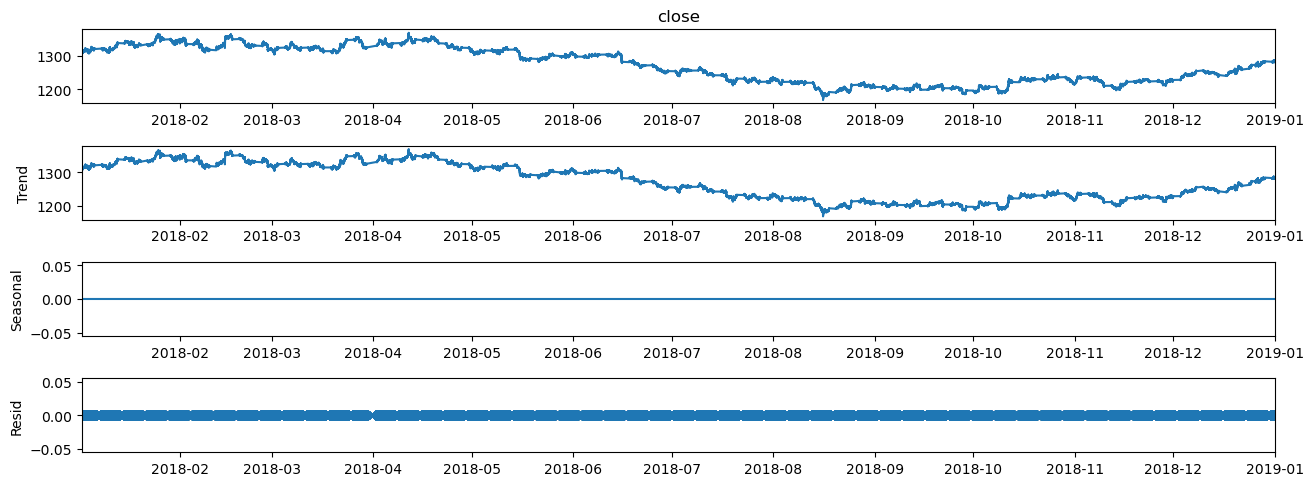

In [30]:
decompose = seasonal_decompose(df['close'], period = 1)

fig = decompose.plot()
fig.set_size_inches((15, 5))
plt.show()

<div class = 'alert alert-info'>
    <p>
        <b>Interpretation:</b> The time series data show a significant trend. 
    </p>
</div>

## Adfuller Test

In [31]:
adfuller_test = adfuller(df['close'])

In [32]:
print(f'1. Critical Value: {adfuller_test[0]:.2f}')
print(f'2. P-Value: {adfuller_test[1]:.3f}')
print(f'3. Lags used in the regression to determine T-statistic: {adfuller_test[2]}')
print(f'4. Number of observations used in the analysis: {adfuller_test[3]}')
print(f'5. T-values corresponding to adfuller test:')
for key, val in adfuller_test[4].items():
    print(f'\t → {key} : {val:.2f}')

1. Critical Value: -1.30
2. P-Value: 0.629
3. Lags used in the regression to determine T-statistic: 64
4. Number of observations used in the analysis: 350386
5. T-values corresponding to adfuller test:
	 → 1% : -3.43
	 → 5% : -2.86
	 → 10% : -2.57


<hr style="border:1px solid gray">

<a id = 'autoreg_non_stationary'></a>
# AutoReg on non-stationary time series

### Differencing: Order 1

To create the need to differentiate the target value, we'll use a range of data (0:30000).

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import ar_select_order, AutoReg

In [243]:
# Upload data, set datetime index
data = pd.read_csv('Upload/15.8.csv')
data['date'] = pd.to_datetime(data['ts'])
data = data.set_index(pd.DatetimeIndex(data['date'])).drop(columns = ['ts', 'date'])
#data = data['close']

#### plot

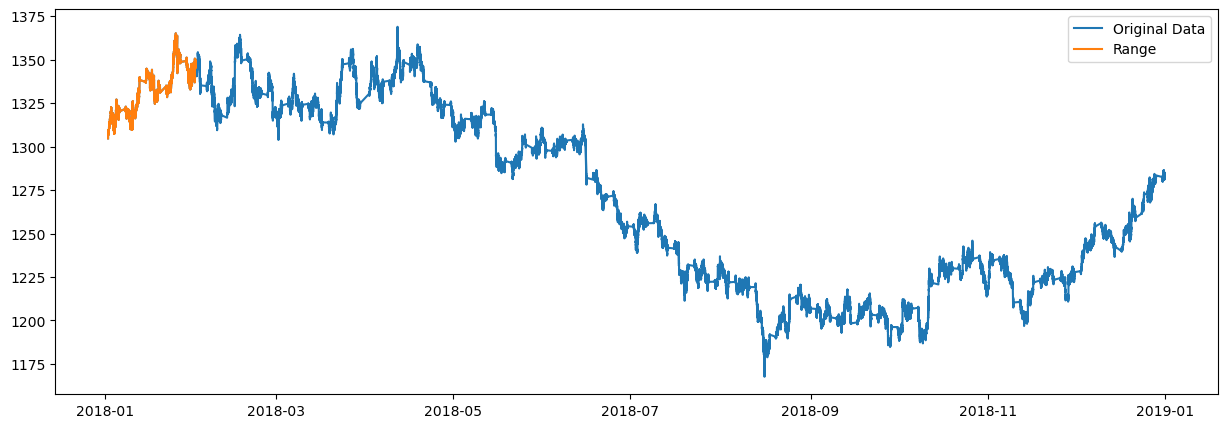

In [249]:
# Plot data
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(data.index, data['close'])
# Used range
ax.plot(data.iloc[0:30000].index, data.iloc[0:30000]['close'])
ax.legend(['Original Data', 'Range'])
plt.show()

#### adfuller

In [253]:
test = data.iloc[0:30000]

adfuller_close = adfuller(test['close'])
print(f'1. ADF - Critical Value: {adfuller_close[0]:.2f}')
print(f'2. P-Value: Reject HA (NOT reject H0): {adfuller_close[1]:.4f} → The TIME SERIES is NOT STATIONARY')
print(f'3. Lags used for regression: {adfuller_close[2]}')
print(f'4. Observations used in the analysis: {adfuller_close[3]}')
print(f'5. T-values corresponding to Adfuller Test:')
for key, val in adfuller_close[4].items():
    print(f'\t ► {key} : {val:.2f}')

1. ADF - Critical Value: -1.92
2. P-Value: Reject HA (NOT reject H0): 0.3213 → The TIME SERIES is NOT STATIONARY
3. Lags used for regression: 3
4. Observations used in the analysis: 29996
5. T-values corresponding to Adfuller Test:
	 ► 1% : -3.43
	 ► 5% : -2.86
	 ► 10% : -2.57


#### cut range

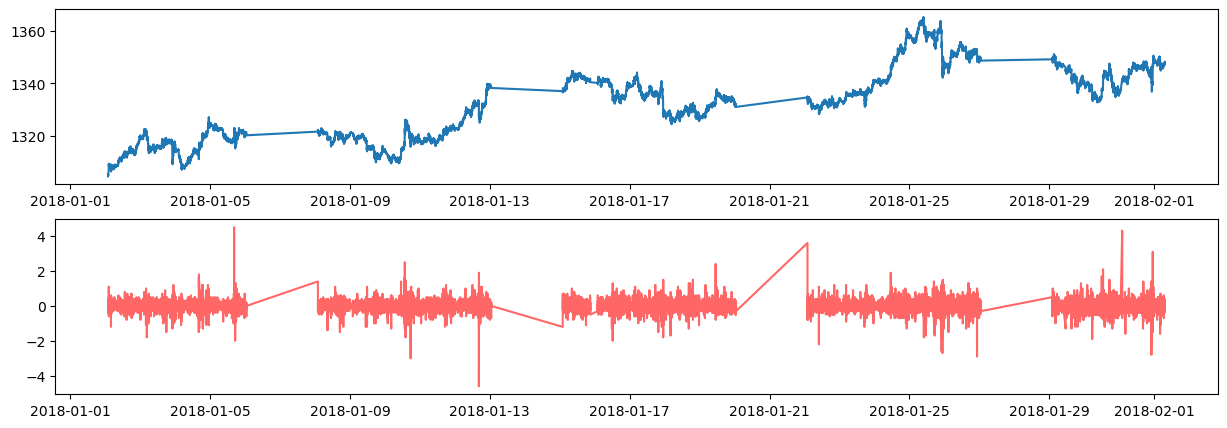

In [265]:
# Use differencing method
#fill_val = data.iloc[0]['close']
fill_val = data['close'].rolling(window = 5).mean().dropna()[0]
data['shift1'] = data['close'].shift(1).fillna(fill_val)
data['difference'] = data['close'] - data['shift1']

# Range the dataset and plot the close and difference columns
test = data.iloc[0:30000]
fig, ax = plt.subplots(2, 1, figsize = (15, 5))
ax[0].plot(test.index, test['close'])
ax[1].plot(test['difference'], c = 'r', alpha = .6)
plt.show()

#### Use Adfuller test to check if the difference column is stationary

In [268]:
adfuller_diff = adfuller(test['difference'])
print(f'1. ADF - Critical Value: {adfuller_diff[0]:.2f}')
print(f'2. P-Value: Reject HA (NOT reject H0): {adfuller_diff[1]:.4f} → The TIME SERIES is STATIONARY')
print(f'3. Lags used for regression: {adfuller_diff[2]}')
print(f'4. Observations used in the analysis: {adfuller_diff[3]}')
print(f'5. T-values corresponding to Adfuller Test:')
for key, val in adfuller_diff[4].items():
    print(f'\t ► {key} : {val:.2f}')

1. ADF - Critical Value: -104.83
2. P-Value: Reject HA (NOT reject H0): 0.0000 → The TIME SERIES is STATIONARY
3. Lags used for regression: 2
4. Observations used in the analysis: 29997
5. T-values corresponding to Adfuller Test:
	 ► 1% : -3.43
	 ► 5% : -2.86
	 ► 10% : -2.57


#### ACF and PACF

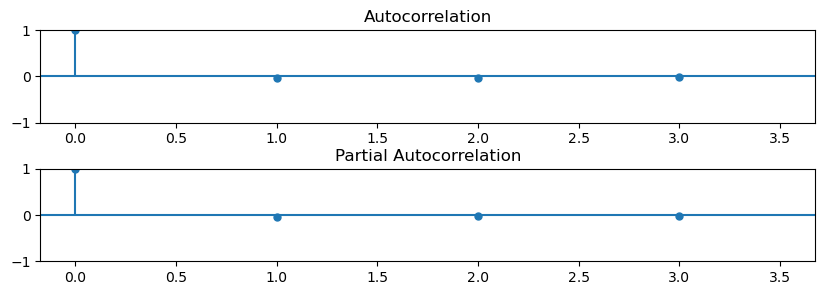

In [272]:
# ACF
fig, ax = plt.subplots(2, 1, figsize = (10, 3))
plot_acf(test['difference'], lags = 3, ax = ax[0])
plot_pacf(test['difference'], lags = 3, ax = ax[1])
plt.subplots_adjust(hspace = .5, wspace = .5)
plt.show()

#### Select Order

In [286]:
selected_lags = ar_select_order(test['difference'], maxlag = 12).ar_lags
print(f'Number of Lags: {selected_lags}')

Number of Lags: [1, 2]


#### Testing AutoReg on Differenced Data

In [290]:
# Train and Test split
x_train, x_test = np.split(test, [int(len(test) * .7)])

model = AutoReg(x_train['difference'], lags = selected_lags).fit()

print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:             difference   No. Observations:                21000
Model:                     AutoReg(2)   Log Likelihood                 579.907
Method:               Conditional MLE   S.D. of innovations              0.235
Date:                Mon, 15 Apr 2024   AIC                          -1151.815
Time:                        13:46:16   BIC                          -1120.006
Sample:                             2   HQIC                         -1141.433
                                21000                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0016      0.002      0.976      0.329      -0.002       0.005
difference.L1    -0.0544      0.007     -7.890      0.000      -0.068      -0.041
difference.L2    -0.0401      0.007     

#### Predict x_test

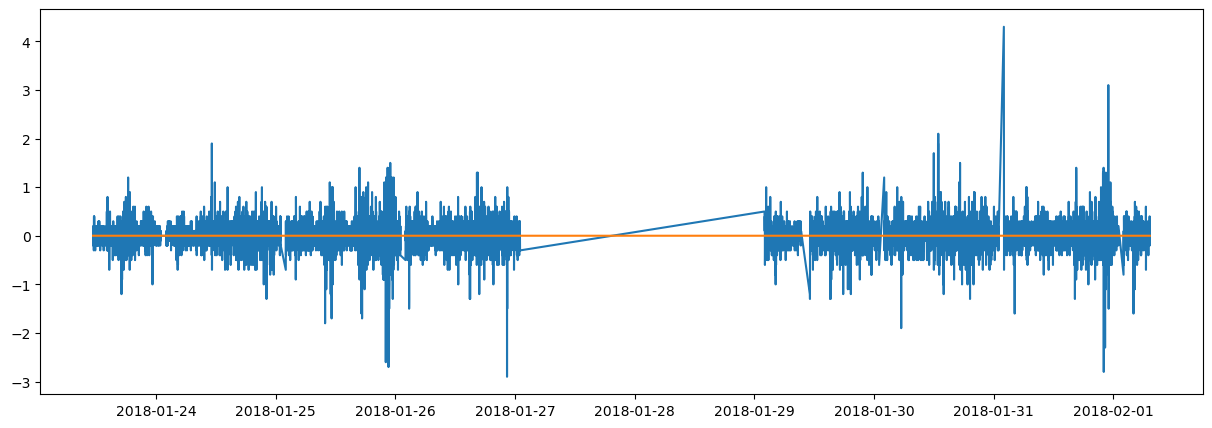

In [300]:
pred = pd.DataFrame(model.predict(start = len(x_train), end = len(test)-1)
                    , columns = ['difference']).set_index(x_test.index)

fig, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(x_test.index, x_test['difference'])
ax.plot(pred.index, pred['difference'])
plt.show()

<hr style="border:1px solid gray">

<a id = 'autoreg_stationary'></a>
# AutoReg on stationary time series

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [75]:
df = pd.read_csv('Upload/15.8.csv')

#### plot

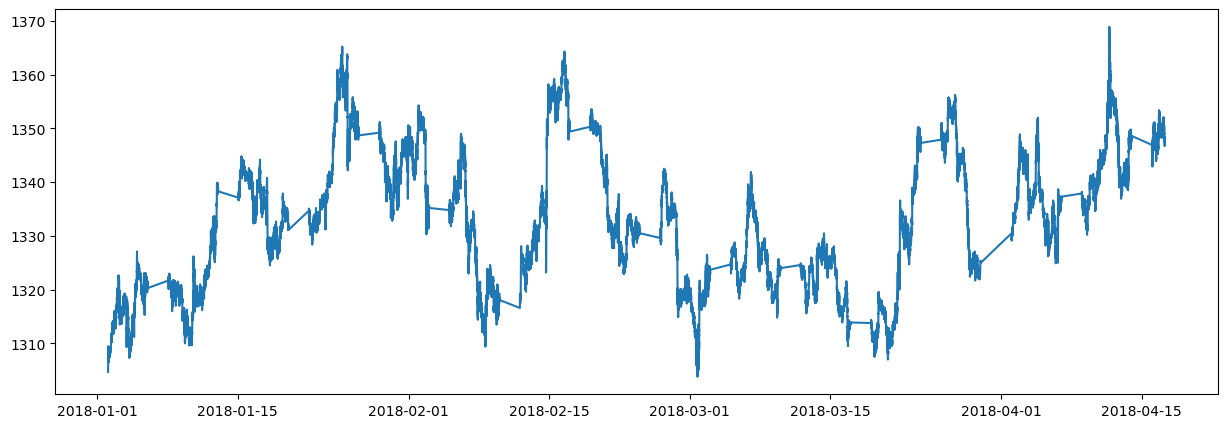

In [81]:
test = df.copy()
test = test.iloc[0:100000]

test = test.set_index(pd.DatetimeIndex(test['ts'])).sort_index()
test.index = test.index.rename('datetimeindex')
test = test.drop(columns = test.columns.difference(['close']))

fig, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(test.index, test['close'])
plt.show()

#### decompose

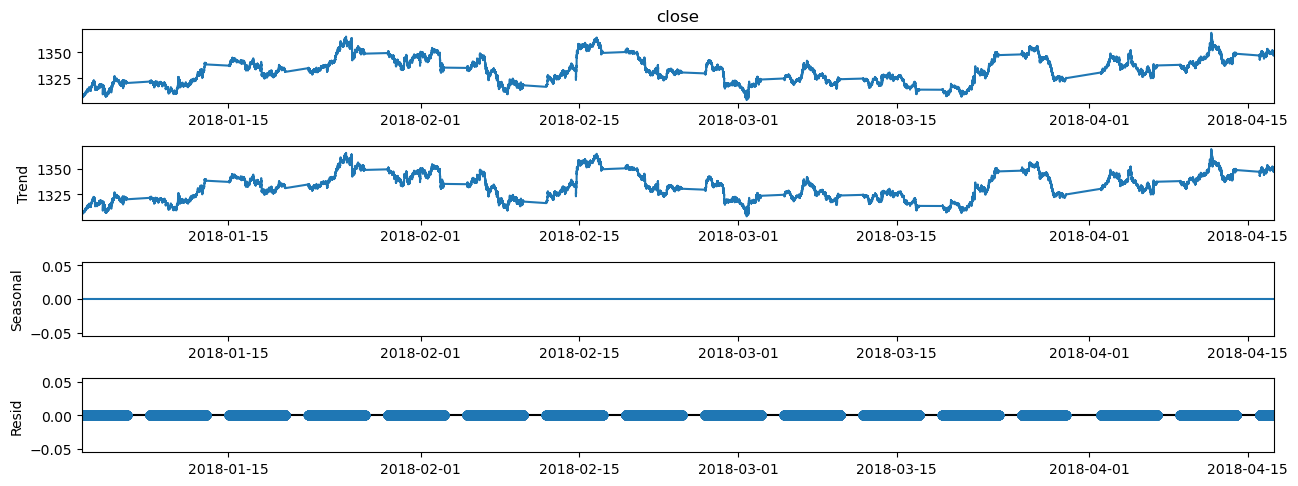

In [85]:
decomposer = seasonal_decompose(test['close'], period = 1)
fig = decomposer.plot()
fig.set_size_inches((15, 5))
plt.show()

#### adfuller

In [98]:
adfuller_test = adfuller(test.iloc[:100000]['close'])
print(f'1. ADF - Critical Value: {adfuller_test[0]:.2f}')
print(f'2. P-Value: Reject HA (NOT reject H0): {adfuller_test[1]:.4f} → The TIME SERIES is stationary')
print(f'3. Lags used for regression: {adfuller_test[2]}')
print(f'4. Observations used in the analysis: {adfuller_test[3]}')
print(f'5. T-values corresponding to Adfuller Test:')
for key, val in adfuller_test[4].items():
    print(f'\t ► {key} : {val:.2f}')

1. ADF - Critical Value: -3.29
2. P-Value: Reject HA (NOT reject H0): 0.0154 → The TIME SERIES is stationary
3. Lags used for regression: 11
4. Observations used in the analysis: 99988
5. T-values corresponding to Adfuller Test:
	 ► 1% : -3.43
	 ► 5% : -2.86
	 ► 10% : -2.57


#### ACF and PACF

In [139]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

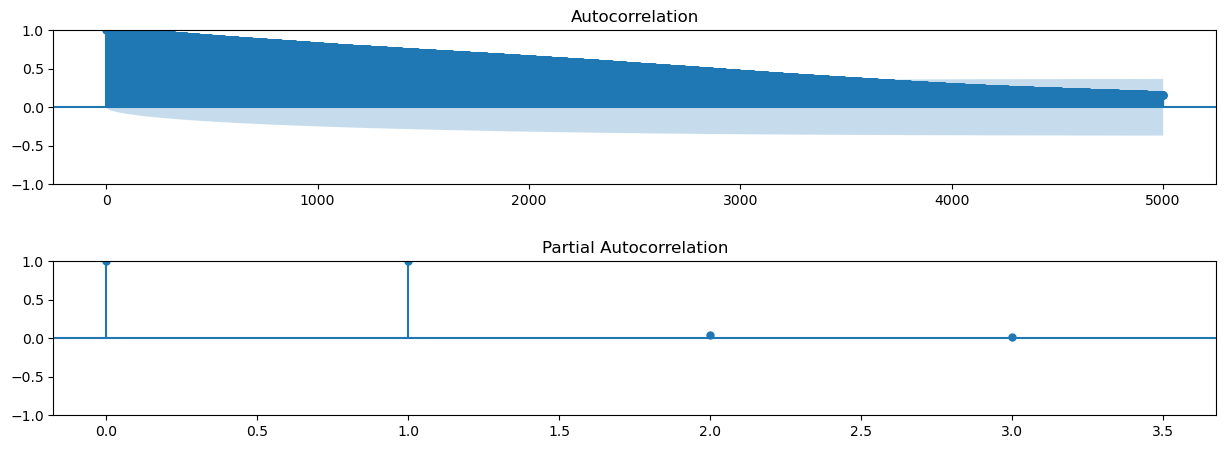

In [152]:
fig, ax = plt.subplots(2, 1, figsize = (15, 5))
plot_acf(test['close'], lags = 5000, ax = ax[0])
plot_pacf(test['close'], lags = 3, ax = ax[1])
fig.subplots_adjust(hspace = .5, wspace = .5)
plt.show()

#### Select Order

In [301]:
selected_lags = ar_select_order(test['close'], maxlag = 12).ar_lags
print(f'Number of Lags: {selected_lags}')

Number of Lags: [1, 2, 3]


#### AutoReg

In [302]:
x_train, x_test = np.split(test, [int(len(test) * .7)])

model = AutoReg(x_train['close'], lags = selected_lags).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  close   No. Observations:                21000
Model:                     AutoReg(3)   Log Likelihood                 583.049
Method:               Conditional MLE   S.D. of innovations              0.235
Date:                Mon, 15 Apr 2024   AIC                          -1156.098
Time:                        13:51:56   BIC                          -1116.337
Sample:                             3   HQIC                         -1143.120
                                21000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4743      0.224      2.118      0.034       0.035       0.913
close.L1       0.9453      0.007    137.093      0.000       0.932       0.959
close.L2       0.0145      0.009      1.526      0.1

#### predict

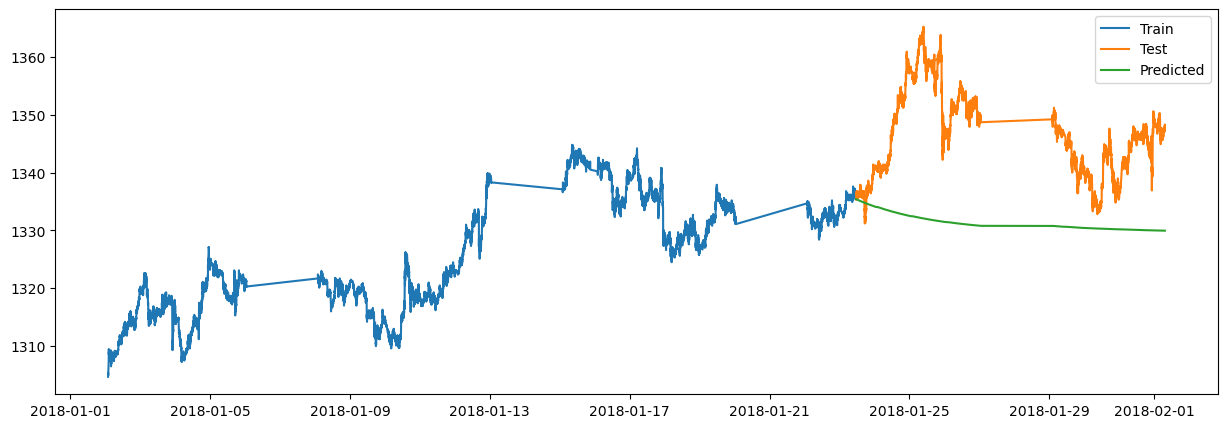

In [303]:
pred = pd.DataFrame(model.predict(start = len(x_train), end = len(test) - 1, dynamic = False), columns = ['close'])
pred = pred.set_index(x_test.index)

fig, ax = plt.subplots(1, 1, figsize = (15, 5))

ax.plot(x_train.index, x_train['close'])
ax.plot(x_test.index, x_test['close'])
ax.plot(pred.index, pred['close'])
ax.legend(['Train', 'Test', 'Predicted'])
plt.show()